In [26]:
#Ensemble des import utiles pour l'execution du notebook
import statsTuxML
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


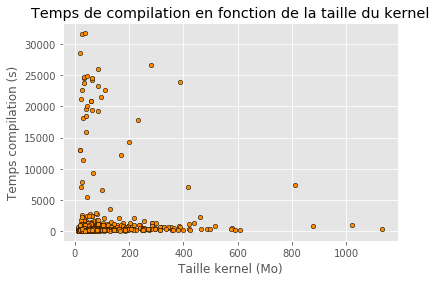

Coefficient de correlation : 0.048687526692714866


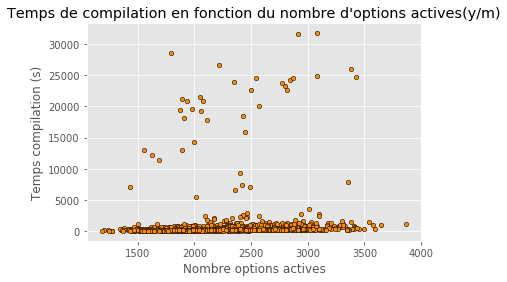

Coefficient de correlation : 0.08777261258669007


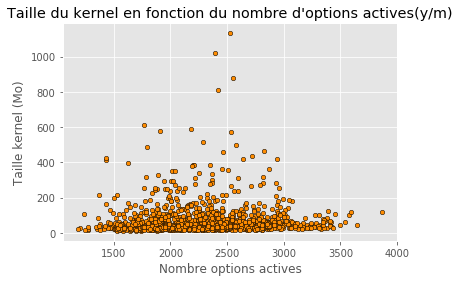

Coefficient de correlation : 0.022752484740051943


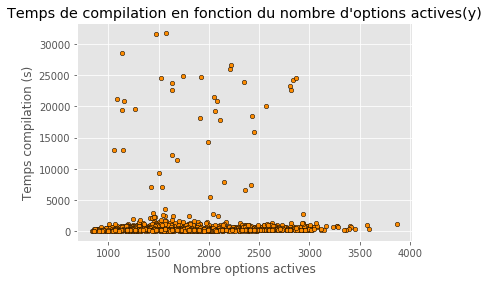

Coefficient de correlation : 0.022877487806083032


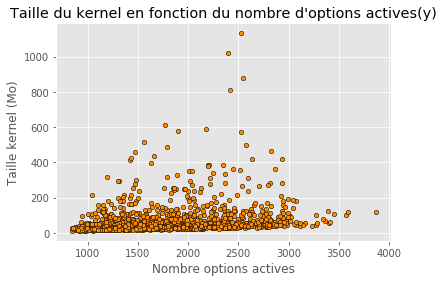

Coefficient de correlation : 0.20247689801464902


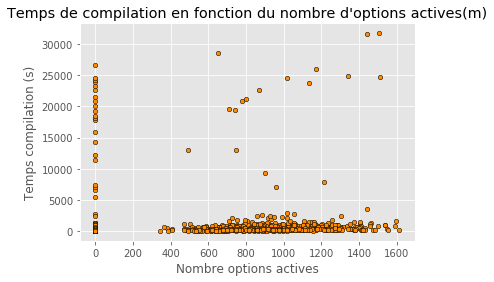

Coefficient de correlation : 0.05295437216454614


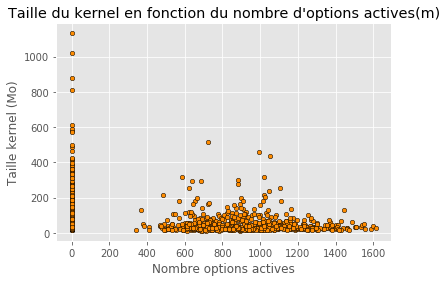

Coefficient de correlation : -0.2117813651316855

Nombre de compilation 1300
Informations sur les options activées en module {'Min': 0, 'Mean': 453.39076923076925, 'Max': 1614, 'Total': 589408}
Informations sur les options activées en dur {'Min': 841, 'Mean': 1839.7484615384615, 'Max': 3869, 'Total': 2391673}
Informations sur les options activées en tout {'Min': 1182, 'Mean': 2293.139230769231, 'Max': 3869, 'Total': 2981081}
Informations sur la taille du kernel {'Min': 10.966537475585938, 'Mean': 69.63968132019043, 'Max': 1132.6719589233398, 'Total': 90531.58571624756}
Informations sur le temps de compilation {'Min': 63.8538, 'Mean': 997.2014797692319, 'Max': 31674.1, 'Total': 1296361.9237000016}


In [27]:
CSV = "set7.csv"

statistiques = statsTuxML.stats(CSV)
nbComp, stats_module, stats_yes, stats_combine, stats_size, stats_time  = statistiques

print("")
print("Nombre de compilation", nbComp)
print("Informations sur les options activées en module", stats_module)
print("Informations sur les options activées en dur", stats_yes)
print("Informations sur les options activées en tout", stats_combine)
print("Informations sur la taille du kernel", stats_size)
print("Informations sur le temps de compilation", stats_time)



In [28]:
listEncode = []

with open(CSV) as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                if not(ligne[i] in listEncode):
                    listEncode.append(ligne[i])


In [29]:
#Preprocessing des data
le = preprocessing.LabelEncoder()
le.fit(listEncode)
list(le.classes_)

['',
 '(none)',
 '-1',
 '/etc/keys/x509_evm.der',
 '/etc/keys/x509_ima.der',
 '/lib/modules/$UNAME_RELEASE/.config',
 '/sbin/init',
 '/sbin/tomoyo-init',
 '/sbin/usermode-helper',
 '0',
 '0x0',
 '0x1',
 '0x1000000',
 '0x200000',
 '0x378',
 '0x8000000',
 '0xa',
 '0xdead000000000000',
 '0xdffffc0000000000',
 '1',
 '10',
 '100',
 '1024',
 '1048576',
 '115200',
 '12',
 '120',
 '128',
 '13',
 '14',
 '16',
 '17',
 '2',
 '20',
 '2048',
 '20480',
 '21',
 '25',
 '250',
 '256',
 '28',
 '3',
 '30',
 '32',
 '4',
 '400',
 '4096',
 '437',
 '48000',
 '5',
 '5000',
 '512',
 '6',
 '64',
 '65536',
 '7',
 '768',
 '8',
 '80',
 '8192',
 'V1F100',
 'apparmor',
 'arch/x86/configs/x86_64_defconfig',
 'bic',
 'binder,hwbinder,vndbinder',
 'cdg',
 'certs/signing_key.pem',
 'cfq',
 'cubic',
 'dctcp',
 'deadline',
 'elf64-x86-64',
 'htcp',
 'hybla',
 'ima-ng',
 'iso8859-1',
 'kernel.org',
 'm',
 'minstrel',
 'minstrel_ht',
 'n',
 'noop',
 'pfifo_fast',
 'reno',
 'rtc0',
 'selinux',
 'sha1',
 'smack',
 'tomoyo',
 

In [30]:
#Extraction des données du CSV

data = [] #Toutes les infos sans temps de compilation et taille du kernel
info = [] #Temps de compilation et taille du kernel

infoTime = []
infoSize =[]

with open(CSV) as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        size = int(ligne["KERNEL_SIZE"]) / (2**20)
        comp = float(ligne["COMPILE_TIME"])
        infoTime.append(comp)
        infoSize.append(size)
        info.append([size,comp])
        tmp = []
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                tmp.append(ligne[i])
        tmpProcess = le.transform(tmp)
        data.append(tmpProcess)


In [31]:
#Separation du training set et du testing set
#data_train, data_test, info_train, info_test = train_test_split(dataPreProcess, info, test_size=0.2, random_state=0)

data_train, data_test, infoSize_train, infoSize_test = train_test_split(data, infoSize, test_size=0.2, random_state=0)



In [32]:
# Decision Tree

# Apprentissage du model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor() #Pas de profondeur max
regr_1.fit(data_train, infoSize_train)
regr_2.fit(data_train, infoSize_train)

# Prediction
info_predict_1 = regr_1.predict(data_test)
info_predict_2 = regr_2.predict(data_test)

# Calcul des erreurs
absErr_1 = mean_absolute_error(infoSize_test, info_predict_1)
absErr_2 = mean_absolute_error(infoSize_test, info_predict_2)

sqrtErr_1 = mean_squared_error(infoSize_test, info_predict_1)
sqrtErr_2 = mean_squared_error(infoSize_test, info_predict_2)

r2Score_1 = r2_score(infoSize_test, info_predict_1)
r2Score_2 = r2_score(infoSize_test, info_predict_2)

#Affichage des marges d'erreurs
print("Valeur faible = Meilleur prédiction")
print("Moyenne absolue des erreurs : arbre 1 :", absErr_1, "; arbre 2 :", absErr_2)
print("Moyenne au carré des erreurs : arbre 1 :", sqrtErr_1, "; arbre 2 :", sqrtErr_2)
print("")
print("Valeur proche de 1 = Meilleur prédiction")
print("Score r² : arbre 1 :", r2Score_1, "; arbre 2 :", r2Score_2)


Valeur faible = Meilleur prédiction
Moyenne absolue des erreurs : arbre 1 : 28.166388335667083 ; arbre 2 : 30.816957033597507
Moyenne au carré des erreurs : arbre 1 : 3215.9558804427184 ; arbre 2 : 5745.242630354459

Valeur proche de 1 = Meilleur prédiction
Score r² : arbre 1 : 0.28374299478926157 ; arbre 2 : -0.2795792086738009


In [33]:
print(regr_1.get_params())
print(regr_2.get_params())

{'max_leaf_nodes': None, 'min_samples_split': 2, 'random_state': None, 'criterion': 'mse', 'min_impurity_split': None, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'max_depth': 10, 'presort': False, 'min_impurity_decrease': 0.0, 'splitter': 'best'}
{'max_leaf_nodes': None, 'min_samples_split': 2, 'random_state': None, 'criterion': 'mse', 'min_impurity_split': None, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'max_depth': None, 'presort': False, 'min_impurity_decrease': 0.0, 'splitter': 'best'}


In [34]:
#Random Forest Decision Tree

# Apprentissage du model (Profondeur limitée)
forest1 = RandomForestRegressor(max_depth=20, random_state=0)
forest1.fit(data_train, infoSize_train)

# Prediction
info_predict_3 = forest1.predict(data_test)

# Calcul des erreurs
absErr_3 = mean_absolute_error(infoSize_test, info_predict_3)

print(absErr_3)

29.48079458895279


In [35]:
#Random Forest Decision Tree

# Apprentissage du model (Pas de profondeur max)
forest2 = RandomForestRegressor(max_depth=None, random_state=0)
forest2.fit(data_train, infoSize_train)

# Prediction
info_predict_4 = forest2.predict(data_test)

# Calcul des erreurs
absErr_4 = mean_absolute_error(infoSize_test, info_predict_4)

print(absErr_4)

30.255591573813025


In [38]:
import pandas

importances = regr_1.feature_importances_ # forest2.feature_importances_
indices = np.argsort(importances)[::-1]    

print("Feature ranking:")
indices
data
with open(CSV) as csvFile :
    csvFile = pandas.read_csv(csvFile)
    

for f in range(len(csvFile)):
    print("%d. feature %s %d (%f)" % (f + 1, csvFile.columns[indices[f]], indices[f], importances[indices[f]]))

csvFile['COMPILE_TIME']
# Plot the feature importances of the forest
#plt.figure()
# plt.title("Feature importances for " + predDimension)
#plt.bar(range(X.shape[1]), importances[indices],color="r", align="center")
#plt.xticks(range(X.shape[1]), indices)
#plt.xlim([-1, X.shape[1]])
#plt.show()


Feature ranking:


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11836,12318,12319,12356,12362) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. feature CFG80211_REG_CELLULAR_HINTS 2148 (0.301760)
2. feature DVB_USB_LME2510 6906 (0.123724)
3. feature MFD_MAX8997 6483 (0.103942)
4. feature USB_GSPCA_PAC7311 6811 (0.069136)
5. feature PHY_S5PV210_USB2 11467 (0.055853)
6. feature CDROM_PKTCDVD_BUFFERS 2634 (0.047116)
7. feature RING_BUFFER_ALLOW_SWAP 12132 (0.043254)
8. feature SERIAL_ARC 5042 (0.034321)
9. feature X86_UP_APIC 690 (0.027605)
10. feature SND_SOC_MAX9860 8658 (0.014396)
11. feature MAGIC_SYSRQ 11981 (0.013278)
12. feature SCSI_EATA_PIO 2935 (0.012186)
13. feature INPUT_UINPUT 4716 (0.010017)
14. feature REED_SOLOMON_DEC8 12735 (0.008410)
15. feature COMMON_CLK_SI514 10525 (0.007576)
16. feature MMA8452 10984 (0.006848)
17. feature GIC_NON_BANKED 11334 (0.006666)
18. feature PINCTRL_DIGICOLOR 5490 (0.006371)
19. feature DRM_I2C_ADV7511 7591 (0.005989)
20. feature MSNDPIN_DIGITAL 8818 (0.005044)
21. feature BLK_DEV_INITRD 208 (0.004802)
22. feature CRYPTO_LZ4 12526 (0.004472)
23. feature TN3270_CONSOLE 5185 (0.0039

0        464.7260
1        752.0190
2       1175.0700
3        741.1800
4        442.7140
5        415.7650
6        880.3850
7        887.3450
8        458.6620
9        439.5000
10      1305.3600
11       373.1510
12       281.7830
13       290.8680
14       213.9520
15       290.2040
16       247.5350
17       903.0390
18       444.4000
19       968.5480
20       638.1680
21       523.0300
22       627.2090
23       672.4030
24       622.6050
25       377.2320
26       836.3620
27      1065.0600
28       427.4960
29       594.5110
          ...    
1270     178.5040
1271     192.1080
1272     193.1480
1273     309.6460
1274      91.0208
1275     199.6860
1276     278.9220
1277      67.9790
1278     225.0740
1279     211.1730
1280     187.1930
1281     343.7710
1282     175.7670
1283     145.1450
1284     256.4120
1285     190.9940
1286     246.6230
1287     339.2610
1288     170.6760
1289     143.9930
1290     100.7050
1291     139.5020
1292     166.7690
1293     120.8390
1294     1